In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pickle import dump

## 1. data loading

In [5]:
data = pd.read_csv('Datasets/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2.Data analysis

In [4]:
data.shape

(101, 18)

In [5]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

## 3.Data preprocessing

In [7]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
data.drop(labels='animal name',axis=1,inplace=True)

In [7]:
data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [8]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
X = data.drop(labels='type',axis=1)
y = data[['type']]
X.shape,y.shape

((101, 16), (101, 1))

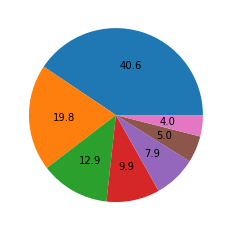

In [10]:
plt.pie(y.value_counts(),autopct='%.1f')
plt.show()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,shuffle=True,random_state=23,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90, 16), (11, 16), (90, 1), (11, 1))

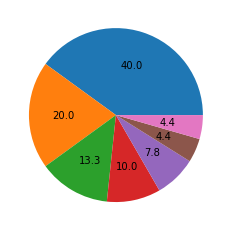

In [12]:
plt.pie(y_train.value_counts(),autopct='%.1f')
plt.show()

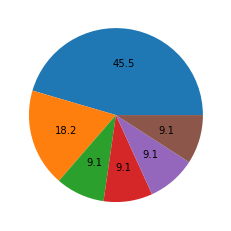

In [13]:
plt.pie(y_test.value_counts(),autopct='%.1f')
plt.show()

## 4. 1.Model building and training

In [14]:
base_model = KNeighborsClassifier()
base_model.fit(X_train,y_train)

KNeighborsClassifier()

## 4.2 Model testing and evaluation

In [15]:
y_pred1 = base_model.predict(X_test)

In [16]:
base_model.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [17]:
accuracy_score(y_test,y_pred1)

0.8181818181818182

In [18]:
confusion_matrix(y_test,y_pred1)

array([[4, 0, 0, 1, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [19]:
print('\n',classification_report(y_test,y_pred1))


               precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.72      0.80      0.74        11
weighted avg       0.77      0.82      0.79        11



## Hyperparameter tuning

In [20]:
params = {'n_neighbors':[2,5,7]}

grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 2}
0.9111111111111111


## model building and training

In [21]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

## model testing and evaluation

In [22]:
y_pred2 = model1.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred2)

0.9090909090909091

In [24]:
confusion_matrix(y_test,y_pred2)

array([[5, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [25]:
print('\n',classification_report(y_test,y_pred2))


               precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.81      0.83      0.82        11
weighted avg       0.83      0.91      0.87        11



## Feature selection

In [26]:
X.shape

(101, 16)

In [39]:
feature_selection =sfs(estimator=model1,k_features='best',forward=True,n_jobs=-1)
feature_selection.fit(X_train,y_train)
selected_features = list(feature_selection.k_feature_names_)
selected_features

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'fins',
 'legs']

In [41]:
len(selected_features),X_train.shape

(11, (90, 16))

In [42]:
X_train_selected = feature_selection.transform(X_train)
X_train_selected.shape

(90, 11)

In [43]:
X_test_selected = feature_selection.transform(X_test)
X_test_selected.shape

(11, 11)

## model with best features

In [44]:

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train_selected,y_train)
pred = model2.predict(X_test_selected)

In [45]:
accuracy_score(y_test,pred)

1.0

In [46]:
confusion_matrix(y_test,pred)

array([[5, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [47]:
print('\n',classification_report(y_test,pred))


               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### Deploying Final Model

In [49]:
dump(model2,open('Animal_type_pred.pkl','wb'))